In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy
from skimage import color, io
from skimage.transform import resize
from skimage.io import imsave

In [2]:
def loadImage(path):
    img = io.imread(path)[:,:,:3]
    L = color.rgb2lab(img)[:,:,0]
    shape = img.shape
    img = resize(img, (256, 256), True)
    img = img.reshape((img.shape[0], img.shape[1], 3))
    img = img.astype(numpy.float32)
    img = color.rgb2lab(img)[:,:,0]
    return img.reshape((img.shape[0], img.shape[1], 1)), shape, L

In [3]:
def loadGraph(frozen_graph_filename):
    # We load the protobuf file from the disk and parse it to retrieve the 
    # unserialized graph_def
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # Then, we import the graph_def into a new Graph and returns it 
    with tf.Graph().as_default() as graph:
        # The name var will prefix every op/nodes in your graph
        # Since we load everything in a new graph, this is not needed
        tf.import_graph_def(graph_def, name="prefix")
    return graph

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


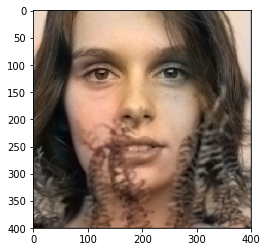

In [4]:
img, shape, L = loadImage('woman.jpg')

graph = loadGraph("model/frozen_model.pb")

x = graph.get_tensor_by_name('prefix/batch:0')
y = graph.get_tensor_by_name('prefix/colorized_image:0')

with tf.Session(graph=graph) as sess:
    y_out = sess.run(y, feed_dict={
        x: [img]
    })
    
    rgb = color.lab2rgb(y_out[0].astype(numpy.float64))
    rgb = resize(rgb, (shape[0], shape[1]), True)
    lab = color.rgb2lab(rgb)
    
    final = numpy.zeros((shape[0], shape[1], 3))
    final[:,:,0] = L
    final[:,:,1] = lab[:,:,1]
    final[:,:,2] = lab[:,:,2]
    
    final = color.lab2rgb(final)
    
    #imsave("result.png", rgb)
    
    plt.imshow(rgb)
    plt.show()